In [2]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# Manipulación de datos perdidos

En esta sección se siguen los siguientes pasos:

1. Se cuentan los valores missing, Nan o None utilizando el comando sample, se crea la variable isnull().sum() para contarlo y se observa que no hay datos perdidos.
2. Se cuentan los valores nulos o iguales a cero.
3. Se imputan los valores iguales a cero de acuerdo a la media.

In [3]:
#Se carga el archivo TOTALULIMPIO1 unificado hombres y mujeres y sin variables repetidas
total=pd.read_excel("TOTALULIMPIO1.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,2,0,2,0,10,...,641984,3525900,3525900,0,0,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,2,7,0,0,0,3,...,201817,296411,296411,9406,0,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,1,0,30,...,143460,1594496,1594496,3200,46,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,1,0,0,2,0,3,...,8704,166200,166200,-2000,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,4,7,0,53,...,6085413,11257778,11907721,25885,84,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,18,1,1,0,24,...,501051,1554335,1566400,0,0,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,65,3,31,0,512,...,21681651,86282095,85785462,262072,2,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,10,2,6,0,49,...,1603874,7892838,7892838,0,36,3682753,4038309,0,0,8600884


1. Se cuentan los valores perdidos en cada columna y se encuentra que no hay datos perdidos.

In [4]:
#Contar los valores perdidos en cada columna
total.sample(11645) #Se listan 11645 filas de datos para ver si tenemos datos perdidos
missing_values_count = total.isnull().sum() #Se crea la variable missing_values_count que cuenta los datos perdidos
missing_values_count[0:64] #Ver la variable missing_values_count en las 64 columnas
#No hay datos perdidos en ninguna columna

ESTABLECIMIENTO        0
DPTO                   0
CIIU                   0
PERIODO                0
                      ..
MPCOMPRADA             0
COMPRAS_MP_EXTERIOR    0
EXPORTACIONES          0
VENTAS                 0
Length: 64, dtype: int64

2.Se cuentan los valores ceros en cada columna

Después de analizar los histogramas (Ver archivo Histogramas de las variables usadas en la investigación), diagramas de dispersión (Ver archivo Diagramas de dispersión de las variables usadas en la investigación) y los diagramas de cajas (Ver archivo Diagramas de cajas de las variables usadas en la investigación) se evidencia la gran cantidad de ceros que toma cada columna (variable)

In [8]:
# Para contar el número de veces que se presenta un valor en una columna se usa value_counts
total.SOCIOS.value_counts()

0     8779
1     1543
2      939
3      247
      ... 
7        3
6        3
20       1
12       1
Name: SOCIOS, Length: 10, dtype: int64

In [9]:
df = pd.DataFrame(total)   #Contar los valores de todas las columnas
contar=df.apply(pd.Series.value_counts) #Valores únicos y conteo para todas las columnas
contar.loc[[0]] # Se utiliza la función loc para mostrar solo la fila cero

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,NaN,NaN,NaN,NaN,8779.0,2390.0,7079.0,6103.0,11565.0,641.0,...,163.0,NaN,NaN,4554.0,6167.0,NaN,419.0,9995.0,8674.0,21.0


Al observar la tabla anterior se observa que 26 variables tienen más de 9000 datos en cero y estas variables son:

*Recursos Humanos:* (algunos) PROD_EXT

*Recursos Tangibles físicos:** (algunos) INVER_TERRENO, INVER_EDIF, INVER_EQTRANSP

*Capacidad dinámica de absorción:** (todos) OUTSOURCING_PROD, OUTSOURCING_ADM, TOTAL_OUTSOURCING, COMPRAS_MP_EXTERIOR

*Capacidad estática de marketing operativa:** (4 de 6) MUESTRASGRATIS_PROD, MUESTRASGRATIS_ADM, TOT_MUESTRASGRATIS, PUBLICIDAD_PROD

*Capacidad dinámica de absorción (transformación):** (todos) USO_PATENTES_ADM, TOTALUSO_PATENTES

*Capacidad de innovación:** (todos) GASTOSEDIF_USOPROPIO, GASTOSMAQ_USOPROPIO, GASTOSEINFORMATICA_USOPROPIO, GASTOSEOFICINA_USOPROPIO, GASTOSEQTRANSP_USOPROPIO, TOTALGASTOS_USOPROPIO

*Capacidad tecnológica dinámica:** (algunos) COMPRAEINFORMATICA_USADO, VAL_VENDIDOS_EINFORMATICA

**En total el 53,3% de los datos tienen valor igual a cero**

# 3.Se imputan los valores iguales a cero de acuerdo a la media

Sustitución por la Media. Consiste en sustituir el valor ausente por la Media de los valores válidos. Este procedimiento plantea inconvenientes como:

Dificulta la estimación de la Variáncia.

Distorsiona la verdadera distribución de la variable,

Distorsiona la correlación entre variables dado que añade valores constantes.

Por la manera en que se realiza la sustitución de los datos omitidos, la suma de cuadrados de las desviaciones de las
observaciones respecto de la media permanece inalterada pero se incrementa el tamaño de muestra, lo cual origina que la varianza de la variable disminuya y se generen, en forma artificial, intervalos de confianza más estrechos. 

En caso de que las variables imputadas se utilicen en análisis secundario de datos, se demuestra, por ejemplo, que en los modelos de regresión se alteran los valores de los parámetros estimados, así como su significancia estadística. 

https://repositorio.cepal.org/bitstream/handle/11362/4755/S0700590_es.pdf

https://www.upo.es/revistas/index.php/RevMetCuant/article/download/2120/1689

La clase Imputer proporciona estrategias básicas para imputar valores perdidos. Los valores faltantes se pueden imputar con un valor constante proporcionado, o utilizando las estadísticas (media, mediana o más frecuente) de cada columna en la que se encuentran los valores faltantes. Esta clase también permite diferentes codificaciones de valores perdidos.

In [5]:
from sklearn.preprocessing import Imputer #Se importan la libreria
#Se imputan los valores iguales a cero de acuerdo a la media
imp = Imputer(missing_values=0, strategy='mean', axis=0) #Axis=0 para cada columna
totallim=imp.fit_transform(total) 

totallimpio= pd.DataFrame(imp.fit_transform(total)) #Se guarda el archivo con datos imputados en el Dataframe totallimpio
totallimpio.columns = total.columns #Se dejan las mismas columnas del archivo TOTALULIMPIO1
totallimpio

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898.0,11.0,1810.0,2008.0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900.0,3525900.0,343423.189677,79.846659,912761.0,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904.0,11.0,1810.0,2008.0,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411.0,296411.0,9406.000000,79.846659,122106.0,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912.0,11.0,1810.0,2008.0,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496.0,1594496.0,3200.000000,46.000000,366562.0,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913.0,11.0,1741.0,2008.0,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200.0,166200.0,-2000.000000,79.846659,92868.0,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11641,987525.0,8.0,139.0,2016.0,1.665038,46.562075,4.000000,7.000000,2.2875,53.0,...,6085413.0,11257778.0,11907721.0,25885.000000,84.000000,3431145.0,4925968.0,5.155038e+06,6.546530e+05,11002090.0
11642,987529.0,8.0,139.0,2016.0,1.665038,18.000000,1.000000,1.000000,2.2875,24.0,...,501051.0,1554335.0,1566400.0,343423.189677,79.846659,794639.0,279709.0,2.448030e+05,4.996960e+06,1657388.0
11643,987530.0,8.0,139.0,2016.0,1.665038,65.000000,3.000000,31.000000,2.2875,512.0,...,21681651.0,86282095.0,85785462.0,262072.000000,2.000000,22787632.0,46732723.0,2.530882e+06,4.958378e+07,85991402.0
11644,987533.0,8.0,139.0,2016.0,1.665038,10.000000,2.000000,6.000000,2.2875,49.0,...,1603874.0,7892838.0,7892838.0,343423.189677,36.000000,3682753.0,4038309.0,5.155038e+06,4.996960e+06,8600884.0


# Datos Atípicos

Un valor atípico es una observación que se aleja demasiado de la moda; esta muy lejos de la tendencia principal del resto de los datos. Pueden ser causados por errores en la recolección de datos o medidas inusuales. Generalmente se recomienda eliminarlos del conjunto de datos. Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos. 

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Pasos:

1. Se realiza un gráfico de cajas de las variables de estudio utilizando la función boxplot() Ver archivo Diagramas de caja de variables seleccionadas en la investigación.

2. Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna (FORMA 1) escogiendo los datos que estan dentro de 3 desviaciones estándar de la media

3. Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna (FORMA 2) utilizando el puntaje Z

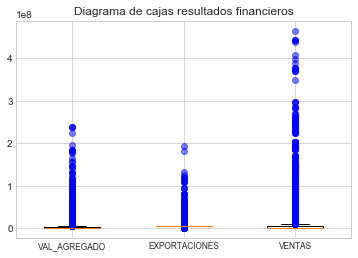

In [18]:
#Se crea un gráfico de cajas con la función boxplot ()
k=plt.boxplot([totallimpio.VAL_AGREGADO,totallimpio.EXPORTACIONES,totallimpio.VENTAS],sym="b+",widths=0.5,whis=1.5)
#sym b+ para el símbolo de los puntos, widths establece el ancho de cada cuadro y whis el alcance de los bigotes

plt.xticks([1,2,3],["VAL_AGREGADO","EXPORTACIONES","VENTAS"],size="small") #Nombre de las etiquetas del eje X

plt.title("Diagrama de cajas resultados financieros"); #Título

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # Los puntos aislados son valores atípicos
    
plt.savefig("Diagrama de cajas resultados financieros.png") #Se guarda el gráfico en formato png

# Forma 1

Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna escogiendo los datos que estan dentro de 3 desviaciones estándar de la media y obteniendo 10295 filas

In [6]:
from scipy import stats #Se importan las librerias

# Se filtran los datos que estan dentro de 3 desviaciones estándar de acuerdo a la media
totalfiltrado=totallimpio[(np.abs(stats.zscore(totallimpio)) < 3).all(axis=1)] #Axis=1 para todas las columnas
totalfiltrado

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898.0,11.0,1810.0,2008.0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900.0,3525900.0,343423.189677,79.846659,912761.0,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904.0,11.0,1810.0,2008.0,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411.0,296411.0,9406.000000,79.846659,122106.0,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912.0,11.0,1810.0,2008.0,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496.0,1594496.0,3200.000000,46.000000,366562.0,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913.0,11.0,1741.0,2008.0,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200.0,166200.0,-2000.000000,79.846659,92868.0,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459.0,8.0,1410.0,2016.0,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356.0,1290356.0,11182.000000,54.000000,790408.0,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465.0,8.0,1410.0,2016.0,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414.0,3679414.0,343423.189677,8.000000,1476328.0,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467.0,8.0,1410.0,2016.0,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225.0,15550083.0,503083.000000,400.000000,7454626.0,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483.0,8.0,1410.0,2016.0,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882.0,1284882.0,343423.189677,18.000000,835716.0,421689.0,5.155038e+06,1.717450e+05,1180126.0


# Forma 2

Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna utilizando el puntaje Z y obteniendo 10295 filas

El puntaje Z es el número firmado de desviaciones estándar por las cuales el valor de una observación o punto de datos está por encima del valor medio de lo que se está observando o midiendo 

In [7]:
z = np.abs (stats.zscore (totallimpio)) 
z #Se halla el valor z
np.where (z> 3)  #Mostrar los puntajes z mayores a 3

(array([   26,    26,    52, ..., 11643, 11643, 11644], dtype=int32),
 array([13, 15,  4, ..., 60, 62,  2], dtype=int32))

In [8]:
total_limpio = totallimpio [(z <3) .all (axis = 1)] #Se eliminan las columnas con valores atípicos
total_limpio

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898.0,11.0,1810.0,2008.0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900.0,3525900.0,343423.189677,79.846659,912761.0,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904.0,11.0,1810.0,2008.0,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411.0,296411.0,9406.000000,79.846659,122106.0,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912.0,11.0,1810.0,2008.0,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496.0,1594496.0,3200.000000,46.000000,366562.0,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913.0,11.0,1741.0,2008.0,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200.0,166200.0,-2000.000000,79.846659,92868.0,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459.0,8.0,1410.0,2016.0,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356.0,1290356.0,11182.000000,54.000000,790408.0,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465.0,8.0,1410.0,2016.0,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414.0,3679414.0,343423.189677,8.000000,1476328.0,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467.0,8.0,1410.0,2016.0,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225.0,15550083.0,503083.000000,400.000000,7454626.0,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483.0,8.0,1410.0,2016.0,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882.0,1284882.0,343423.189677,18.000000,835716.0,421689.0,5.155038e+06,1.717450e+05,1180126.0


In [17]:
# Para guardar el Dataframe se utiliza la función to_excel y se especifíca el nombre del archivo

totalfiltrado.to_excel("TOTALULIMPIO2.xlsx")

# Comparación datos originales y limpios

Finalmente se realiza una comparación de los datos originales (Datos unificando hombres y mujeres y sin variables repetidas Archivo TOTALULIMPIO1) y los datos limpios (Datos imputados y sin datos atípicos Archivo TOTALULIMPIO2) usando:

1. Diagramas de caja (Ver archivo Gráficos de caja de las variables usadas para la investigación).
2. Histogramas (Ver archivo Histogramas de las variables usadas para la investigación).
3. Diagramas de dispersión (Ver archivo Diagramas de dispersión de las variables usadas para la investigación).
4. Estadísticos descriptivos

1.Diagramas de caja (Ver archivo Gráficos de caja de las variables usadas para la investigación).

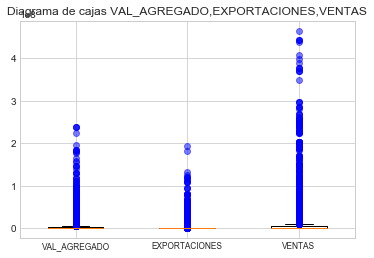

In [5]:
#Diagrama de caja Resultados Financieros datos originales

#Se crea un gráfico de cajas con la función boxplot ()
k=plt.boxplot([total.VAL_AGREGADO,total.EXPORTACIONES,total.VENTAS],sym="b+",widths=0.5,whis=1.5)
#sym b+ para el símbolo de los puntos, widths establece el ancho de cada cuadro y whis el alcance de los bigotes

plt.xticks([1,2,3],["VAL_AGREGADO","EXPORTACIONES","VENTAS"],size="small") #Nombre de las etiquetas del eje X

plt.title("Diagrama de cajas VAL_AGREGADO,EXPORTACIONES,VENTAS"); #Título

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='blue', alpha=0.5)   # Los puntos aislados son valores atípicos
    
plt.savefig("Diagrama de cajas VAL_AGREGADO, EXPORTACIONES, VENTAS originales.png") #Se guarda el gráfico en formato png

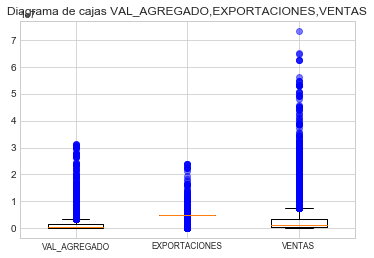

In [6]:
#Diagrama de caja Resultados Financieros datos limpios

#Se crea un gráfico de cajas con la función boxplot ()
k=plt.boxplot([totalfiltrado.VAL_AGREGADO,totalfiltrado.EXPORTACIONES,totalfiltrado.VENTAS],sym="b+",widths=0.5,whis=1.5)
#sym b+ para el símbolo de los puntos, widths establece el ancho de cada cuadro y whis el alcance de los bigotes

plt.xticks([1,2,3],["VAL_AGREGADO","EXPORTACIONES","VENTAS"],size="small") #Nombre de las etiquetas del eje X

plt.title("Diagrama de cajas VAL_AGREGADO,EXPORTACIONES,VENTAS"); #Título

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='blue', alpha=0.5)   # Los puntos aislados son valores atípicos
    
plt.savefig("Diagrama de cajas VAL_AGREGADO,EXPORTACIONES, VENTAS filtrado.png") #Se guarda el gráfico en formato png

2.Histogramas (Ver archivo Histogramas de las variables usadas para la investigación).

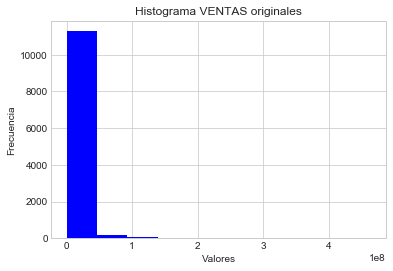

In [13]:
#Histograma Resultados Financieros datos originales

b=plt.hist(total.VENTAS,color="blue") #Histograma de una variable utilizando la función hist()
b=plt.xlabel("Valores")
b=plt.ylabel("Frecuencia");
b=plt.title("Histograma VENTAS originales")
b

plt.savefig("HistogramaVENTAS originales.png") #Guarda la imagen como png NO TIENE DISTRIBUCIÓN NORMAL

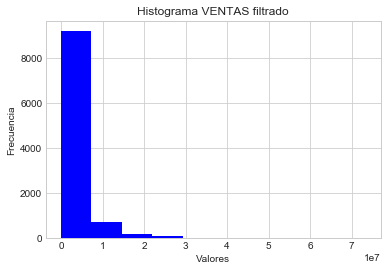

In [12]:
#Histograma Resultados Financieros datos limpios

b=plt.hist(totalfiltrado.VENTAS,color="blue") #Histograma de una variable utilizando la función hist()
b=plt.xlabel("Valores")
b=plt.ylabel("Frecuencia");
b=plt.title("Histograma VENTAS filtrado")
b

plt.savefig("HistogramaVENTAS filtrado.png") #Guarda la imagen como png NO TIENE DISTRIBUCIÓN NORMAL

3.Diagramas de dispersión (Ver archivo Diagramas de dispersión de las variables usadas para la investigación).

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


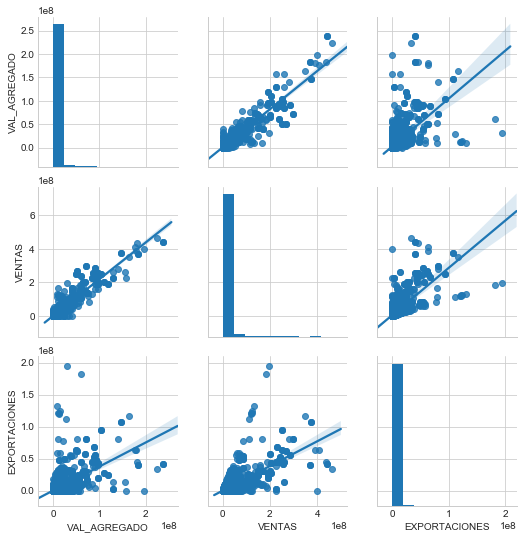

In [130]:
# Resumen gráfico con histogramas y diagramas de dispersión de Resultados Financieros datos originales

b = sns.pairplot(total, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b 
b.savefig("VAL_AGREGADOVENTASEXPORTACIONES original.png") #Guarda la imagen como png

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


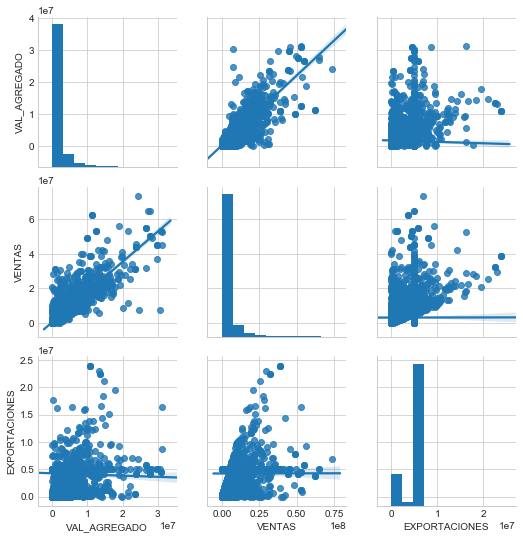

In [131]:
# Resumen gráfico con histogramas y diagramas de dispersión de Resultados Financieros datos limpios

b = sns.pairplot(totalfiltrado, vars=["VAL_AGREGADO","VENTAS","EXPORTACIONES"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables
b.savefig("VAL_AGREGADOVENTASEXPORTACIONES filtrado.png") #Guarda la imagen como png

4.Estadísticos descriptivos

Los estadísticos descriptivos más habitualmente utilizados han sido la media y la desviación típica. Sin embargo, el uso automático de estos índices no es muy aconsejable. Se hallan los valores máximos, media, mediana (percentil 50%), moda, desviación típica, varianza, percentil inferior 25% y percentil superior 75%

In [164]:
#Resumen estadísticos datos originales

estadisoriginal=total.describe() # Resumen estadistadistico con pandas 
#cantidad,media,desviación, mímino, percentil inferior, 50% o mediana, percentil superior, máximo
estadisoriginal

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
count,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000,...,1.164500e+04,1.164500e+04,1.164500e+04,1.164500e+04,11645.000000,1.164500e+04,1.164500e+04,1.164500e+04,1.164500e+04,1.164500e+04
mean,501825.836926,20.841735,1549.005067,2011.981022,0.409790,37.005754,2.105711,5.978703,0.015715,59.872993,...,4.584843e+06,7.787305e+06,7.778359e+06,2.091210e+05,37.561185,3.387853e+06,3.135137e+06,7.304261e+05,1.274879e+06,7.581216e+06
std,388639.971086,25.645191,289.804063,2.497075,0.861227,100.473582,6.594560,24.153399,0.573229,149.767220,...,2.750863e+07,2.652527e+07,2.649900e+07,1.869665e+06,136.416236,1.153659e+07,1.263857e+07,5.072296e+06,6.980126e+06,2.666495e+07
min,140711.000000,5.000000,13.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,9.900000e+02,9.900000e+02,-5.154334e+07,0.000000,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.541820e+05
25%,144700.000000,5.000000,1410.000000,2010.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000,...,1.192260e+05,5.895220e+05,5.881440e+05,0.000000e+00,0.000000,2.563880e+05,1.480340e+05,0.000000e+00,0.000000e+00,5.727380e+05
50%,217217.000000,11.000000,1410.000000,2012.000000,0.000000,10.000000,0.000000,0.000000,0.000000,17.000000,...,3.702640e+05,1.501269e+06,1.495862e+06,2.420000e+03,0.000000,6.630550e+05,5.303650e+05,0.000000e+00,0.000000e+00,1.464990e+06
75%,976117.000000,11.000000,1810.000000,2014.000000,0.000000,30.000000,2.000000,3.000000,0.000000,47.000000,...,1.325081e+06,4.806417e+06,4.785977e+06,5.500000e+04,24.000000,2.102883e+06,1.768285e+06,0.000000e+00,3.012000e+03,4.617908e+06
max,987533.000000,76.000000,1810.000000,2016.000000,20.000000,2843.000000,193.000000,793.000000,58.000000,2438.000000,...,5.742854e+08,4.459258e+08,4.468870e+08,5.813870e+07,3426.000000,2.378099e+08,3.874606e+08,1.415808e+08,1.944166e+08,4.644679e+08


In [165]:
#Resumen estadísticos datos limpios

estadisfiltrado=totalfiltrado.describe() # Resumen estadistadistico con pandas 
#cantidad,media,desviación, mímino, percentil inferior, 50% o mediana, percentil superior, máximo
estadisfiltrado

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
count,10295.000000,10295.000000,10295.000000,10295.000000,10295.000000,10295.000000,10295.000000,10295.000000,10295.000000,10295.000000,...,1.029500e+04,1.029500e+04,1.029500e+04,1.029500e+04,10295.000000,1.029500e+04,1.029500e+04,1.029500e+04,1.029500e+04,1.029500e+04
mean,483875.620204,20.361535,1581.405148,2011.880233,1.628900,31.172199,4.586346,9.484175,2.283996,37.150707,...,1.407091e+06,3.256787e+06,3.252003e+06,2.059495e+05,66.429743,1.519417e+06,1.377069e+06,4.768492e+06,4.239008e+06,3.166524e+06
std,385401.598610,25.310584,197.075038,2.440656,0.336540,34.948688,2.048340,6.396790,0.067675,51.600444,...,3.893766e+06,5.633441e+06,5.628239e+06,3.137207e+05,51.601542,2.734482e+06,2.564353e+06,1.450349e+06,1.922062e+06,5.453200e+06
min,140726.000000,5.000000,1311.000000,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.600000e+01,9.900000e+02,9.900000e+02,-4.960981e+06,2.000000,1.200000e+01,1.000000e+00,2.000000e+00,1.000000e+01,1.644000e+03
25%,144603.000000,5.000000,1410.000000,2010.000000,1.665038,7.000000,3.000000,3.000000,2.287500,8.000000,...,1.151565e+05,5.402620e+05,5.383510e+05,1.561050e+04,26.000000,2.361605e+05,1.636000e+05,5.155038e+06,4.996960e+06,5.290385e+05
50%,147476.000000,11.000000,1410.000000,2012.000000,1.665038,20.000000,5.370346,12.562613,2.287500,18.000000,...,3.290660e+05,1.285847e+06,1.285969e+06,2.490310e+05,79.846659,5.645330e+05,5.228980e+05,5.155038e+06,4.996960e+06,1.264161e+06
75%,975214.000000,11.000000,1810.000000,2014.000000,1.665038,46.562075,5.370346,12.562613,2.287500,49.000000,...,1.041004e+06,3.448457e+06,3.429575e+06,3.434232e+05,79.846659,1.582769e+06,1.571122e+06,5.155038e+06,4.996960e+06,3.374736e+06
max,987529.000000,76.000000,1810.000000,2016.000000,3.000000,338.000000,23.000000,79.000000,3.000000,506.000000,...,6.210732e+07,6.642349e+07,6.631529e+07,4.087005e+06,470.000000,3.124246e+07,3.780525e+07,1.934401e+07,2.390534e+07,7.332316e+07
